Размер: (8124, 23)

Первые 5 строк:
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                    

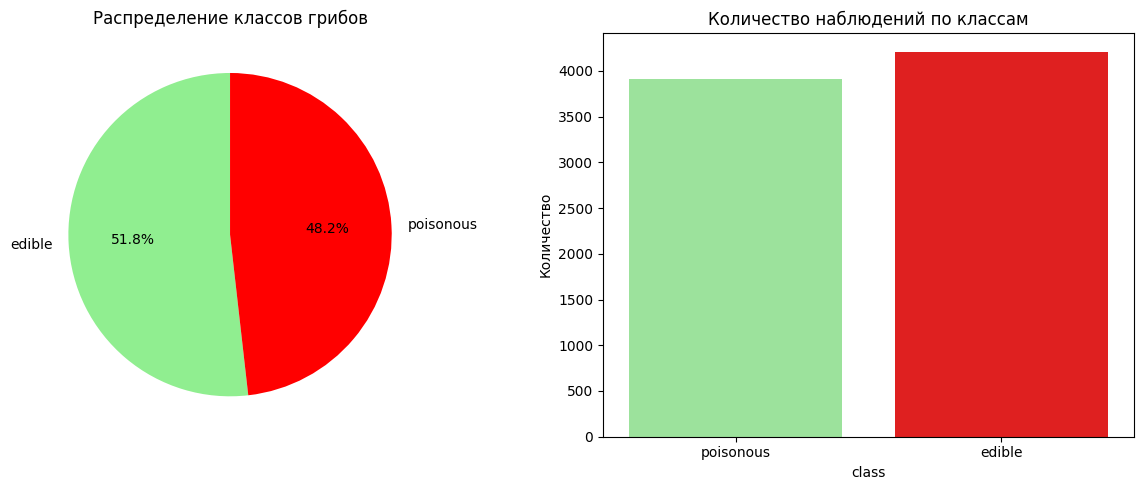

Пропущенные значения:
Series([], dtype: int64)
Колонка 'stalk-root': 2480 пропущенных значений
  Заменено на: 'b'
Размерность после кодирования: (8124, 94)
Количество признаков: 94
Обучающая выборка: (5686, 94)
Тестовая выборка: (2438, 94)

Соотношение классов в обучающей выборке:
Съедобные: 2945 (51.8%)
Ядовитые: 2741 (48.2%)
 Decision Tree:
    Accuracy: 0.9975
    Precision (ядовитые): 0.9949
    Recall (ядовитые): 1.0000
     F1-score (ядовитые): 0.9975
 Random Forest:
    Accuracy: 1.0000
    Precision (ядовитые): 1.0000
    Recall (ядовитые): 1.0000
     F1-score (ядовитые): 1.0000
 AdaBoost:
    Accuracy: 0.9971
    Precision (ядовитые): 1.0000
    Recall (ядовитые): 0.9940
     F1-score (ядовитые): 0.9970
 XGBoost:
    Accuracy: 1.0000
    Precision (ядовитые): 1.0000
    Recall (ядовитые): 1.0000
     F1-score (ядовитые): 1.0000
 CatBoost:
    Accuracy: 1.0000
    Precision (ядовитые): 1.0000
    Recall (ядовитые): 1.0000
     F1-score (ядовитые): 1.0000

Сравнение моделей (от

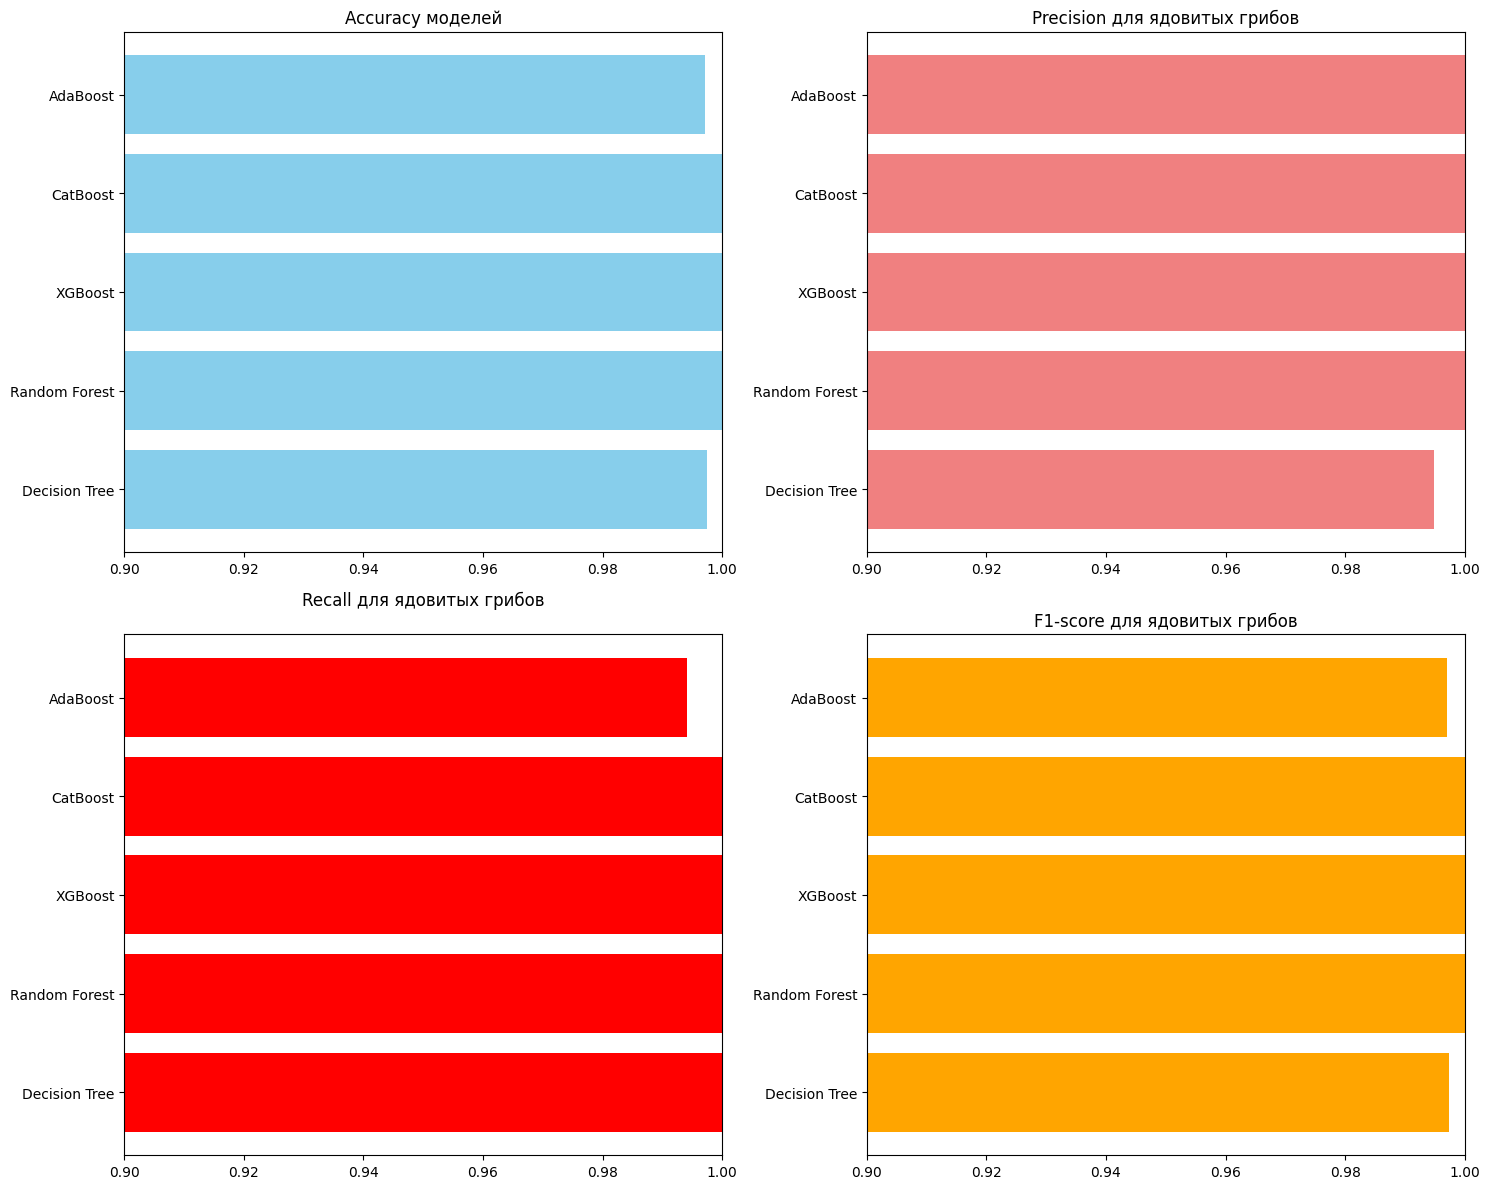


 ЛУЧШАЯ МОДЕЛЬ: Decision Tree
🎯 Recall для ядовитых: 1.0000

📋 Детальный отчет классификации для Decision Tree:
                      precision    recall  f1-score   support

  edible (съедобные)       1.00      1.00      1.00      1263
poisonous (ядовитые)       0.99      1.00      1.00      1175

            accuracy                           1.00      2438
           macro avg       1.00      1.00      1.00      2438
        weighted avg       1.00      1.00      1.00      2438



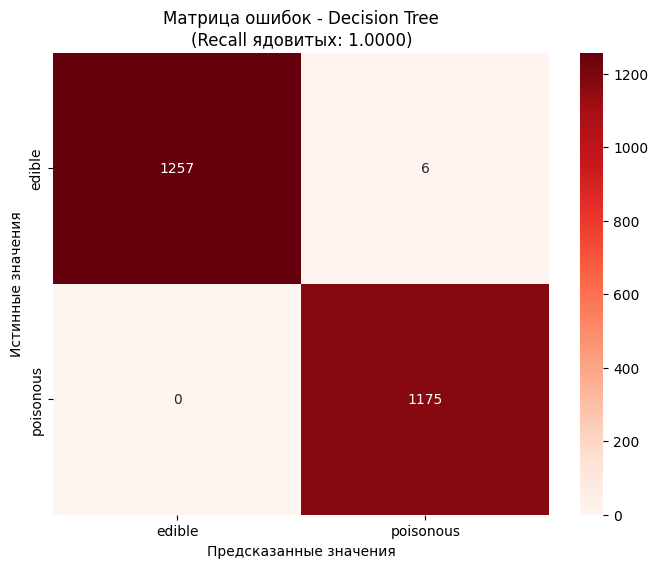


🔍 Анализ важности признаков для Decision Tree:


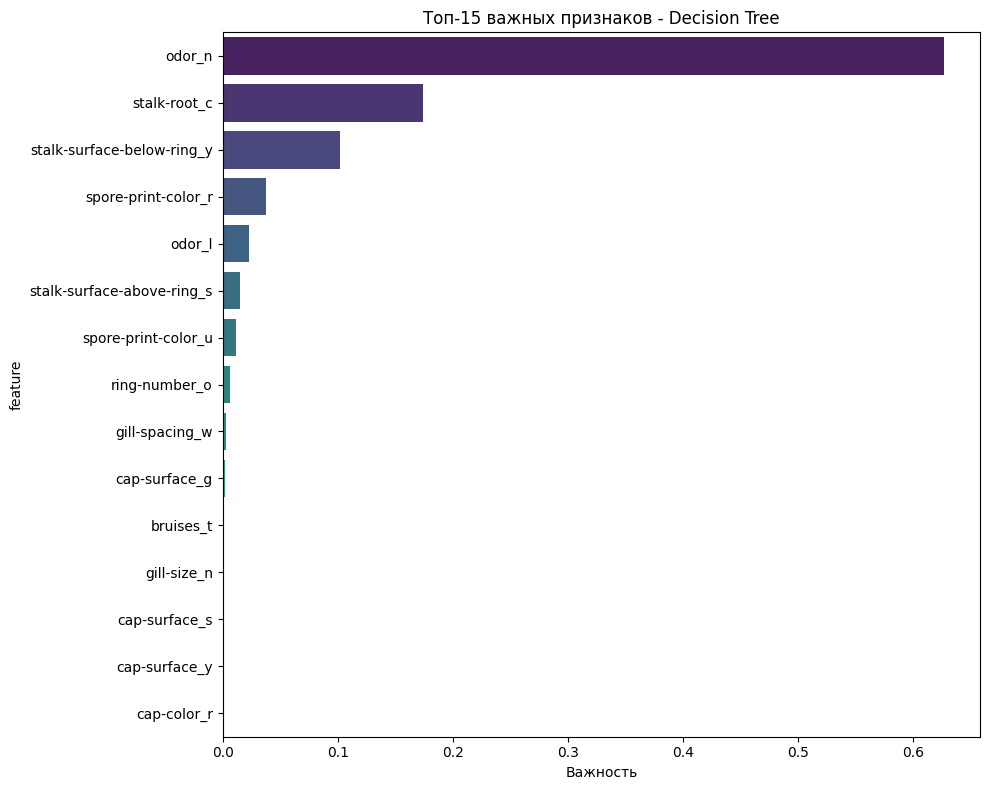

Топ-10 самых важных признаков:
                   feature  importance
                    odor_n    0.626606
              stalk-root_c    0.174365
stalk-surface-below-ring_y    0.101892
       spore-print-color_r    0.037238
                    odor_l    0.022606
stalk-surface-above-ring_s    0.014716
       spore-print-color_u    0.011163
             ring-number_o    0.006040
            gill-spacing_w    0.002533
             cap-surface_g    0.002130

📈 ROC-кривые для моделей:


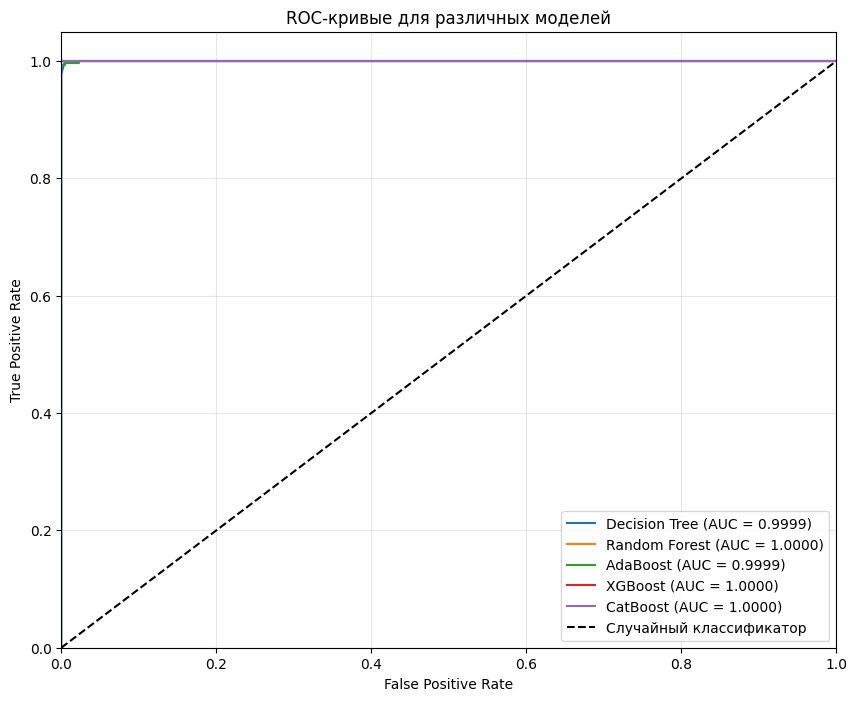

In [2]:
!pip install catboost xgboost scikit-plot -q

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

column_names = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
    'ring-type', 'spore-print-color', 'population', 'habitat'
]

try:
    data = pd.read_csv(url, header=None, names=column_names)
    print(f"Размер: {data.shape}")
except Exception as e:
    print(f"Ошибка загрузки: {e}")
    url_backup = "https://raw.githubusercontent.com/uciml/mushroom-classification/master/mushrooms.csv"
    data = pd.read_csv(url_backup)

print(f"\nПервые 5 строк:")
print(data.head())

print(f"\nИнформация о данных:")
print(data.info())

print("\nАнализ целевой переменной:")
data['class'] = data['class'].map({'e': 'edible', 'p': 'poisonous'})
class_distribution = data['class'].value_counts()

print("Распределение классов:")
print(class_distribution)
print(f"\nСоотношение:")
print(f"Съедобные: {class_distribution['edible']} ({class_distribution['edible']/len(data)*100:.1f}%)")
print(f"Ядовитые: {class_distribution['poisonous']} ({class_distribution['poisonous']/len(data)*100:.1f}%)")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
colors = ['lightgreen', 'red']
plt.pie(class_distribution.values, labels=class_distribution.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
plt.title('Распределение классов грибов')

plt.subplot(1, 2, 2)
sns.countplot(data=data, x='class', palette=colors)
plt.title('Количество наблюдений по классам')
plt.ylabel('Количество')

plt.tight_layout()
plt.show()


print("Пропущенные значения:")
missing_data = data.isnull().sum()
print(missing_data[missing_data > 0])

for col in data.columns:
    if (data[col] == '?').any():
        count_missing = (data[col] == '?').sum()
        print(f"Колонка '{col}': {count_missing} пропущенных значений")
        most_frequent = data[col][data[col] != '?'].mode()[0]
        data[col] = data[col].replace('?', most_frequent)
        print(f"  Заменено на: '{most_frequent}'")


X = data.drop('class', axis=1)
y = data['class']

X_encoded = pd.get_dummies(X, prefix_sep='_', drop_first=True)

print(f"Размерность после кодирования: {X_encoded.shape}")
print(f"Количество признаков: {X_encoded.shape[1]}")

y_encoded = (y == 'poisonous').astype(int)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")

print(f"\nСоотношение классов в обучающей выборке:")
print(f"Съедобные: {(y_train == 0).sum()} ({(y_train == 0).mean()*100:.1f}%)")
print(f"Ядовитые: {(y_train == 1).sum()} ({(y_train == 1).mean()*100:.1f}%)")

models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=6, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=False)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    accuracy = accuracy_score(y_test, y_pred)
    precision_poisonous = precision_score(y_test, y_pred, pos_label=1)
    recall_poisonous = recall_score(y_test, y_pred, pos_label=1)
    f1_poisonous = f1_score(y_test, y_pred, pos_label=1)

    results[name] = {
        'model': model,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'accuracy': accuracy,
        'precision_poisonous': precision_poisonous,
        'recall_poisonous': recall_poisonous,
        'f1_poisonous': f1_poisonous
    }

    print(f" {name}:")
    print(f"    Accuracy: {accuracy:.4f}")
    print(f"    Precision (ядовитые): {precision_poisonous:.4f}")
    print(f"    Recall (ядовитые): {recall_poisonous:.4f}")
    print(f"     F1-score (ядовитые): {f1_poisonous:.4f}")




comparison_data = []
for name in results.keys():
    comparison_data.append({
        'Model': name,
        'Accuracy': results[name]['accuracy'],
        'Precision_Poisonous': results[name]['precision_poisonous'],
        'Recall_Poisonous': results[name]['recall_poisonous'],
        'F1_Poisonous': results[name]['f1_poisonous']
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df_sorted = comparison_df.sort_values('Recall_Poisonous', ascending=False)

print("\nСравнение моделей (отсортировано по Recall для ядовитых):")
print(comparison_df_sorted.to_string(index=False, float_format='%.4f'))

fig, axes = plt.subplots(2, 2, figsize=(15, 12))


axes[0, 0].barh(comparison_df_sorted['Model'], comparison_df_sorted['Accuracy'], color='skyblue')
axes[0, 0].set_title('Accuracy моделей')
axes[0, 0].set_xlim(0.9, 1.0)


axes[0, 1].barh(comparison_df_sorted['Model'], comparison_df_sorted['Precision_Poisonous'], color='lightcoral')
axes[0, 1].set_title('Precision для ядовитых грибов')
axes[0, 1].set_xlim(0.9, 1.0)

axes[1, 0].barh(comparison_df_sorted['Model'], comparison_df_sorted['Recall_Poisonous'], color='red')
axes[1, 0].set_title('Recall для ядовитых грибов\n ')
axes[1, 0].set_xlim(0.9, 1.0)

# F1-score для ядовитых
axes[1, 1].barh(comparison_df_sorted['Model'], comparison_df_sorted['F1_Poisonous'], color='orange')
axes[1, 1].set_title('F1-score для ядовитых грибов')
axes[1, 1].set_xlim(0.9, 1.0)

plt.tight_layout()
plt.show()

# 8. Детальный анализ лучшей модели
best_model_name = comparison_df_sorted.iloc[0]['Model']
best_model = results[best_model_name]['model']
best_recall = comparison_df_sorted.iloc[0]['Recall_Poisonous']

print(f"\n ЛУЧШАЯ МОДЕЛЬ: {best_model_name}")
print(f"🎯 Recall для ядовитых: {best_recall:.4f}")

print(f"\n📋 Детальный отчет классификации для {best_model_name}:")
y_pred_best = results[best_model_name]['predictions']
print(classification_report(y_test, y_pred_best,
                          target_names=['edible (съедобные)', 'poisonous (ядовитые)']))

# Матрица ошибок для лучшей модели
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['edible', 'poisonous'],
            yticklabels=['edible', 'poisonous'])
plt.title(f'Матрица ошибок - {best_model_name}\n(Recall ядовитых: {best_recall:.4f})')
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.show()

# 9. Анализ важности признаков
if hasattr(best_model, 'feature_importances_'):
    print(f"\n🔍 Анализ важности признаков для {best_model_name}:")

    feature_importance = pd.DataFrame({
        'feature': X_encoded.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False).head(15)

    plt.figure(figsize=(10, 8))
    sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
    plt.title(f'Топ-15 важных признаков - {best_model_name}')
    plt.xlabel('Важность')
    plt.tight_layout()
    plt.show()

    print("Топ-10 самых важных признаков:")
    print(feature_importance.head(10).to_string(index=False))

# 10. ROC-кривая для моделей с вероятностями
print("\n📈 ROC-кривые для моделей:")
plt.figure(figsize=(10, 8))

for name in results.keys():
    if results[name]['probabilities'] is not None:
        fpr, tpr, _ = roc_curve(y_test, results[name]['probabilities'])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Случайный классификатор')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для различных моделей')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()



